sklearnは機械学習フレームワーク

In [ ]:
from sklearn import datasets

digitsというデータセットをロード

In [ ]:
digits = datasets.load_digits()

データ表示

In [ ]:
print(digits.data)
print('次元',digits.data.ndim)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
次元 2


In [ ]:
print(digits.data.shape)

(1797, 64)


In [ ]:
print(digits.target) ##０から９のラベルを表示

[0 1 2 ... 8 9 8]


In [ ]:
digits.images[2] ##3番目のデータ取り出し

array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
       [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
       [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
       [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0.],
       [ 0.,  1.,  8., 13., 15.,  1.,  0.,  0.],
       [ 0.,  9., 16., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  3., 13., 16., 16., 11.,  5.,  0.],
       [ 0.,  0.,  0.,  3., 11., 16.,  9.,  0.]])

データを画像として描画する

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

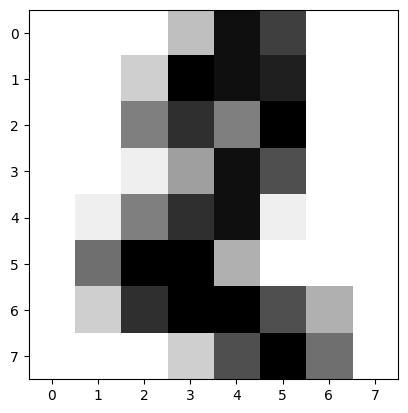

In [ ]:
plt.imshow(digits.images[2], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

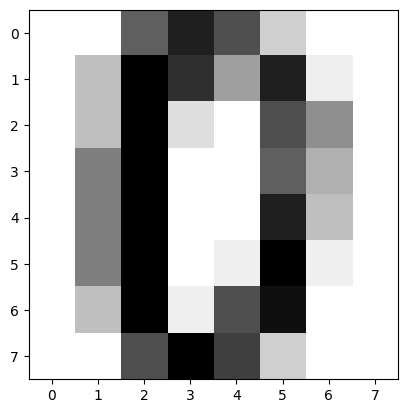

In [ ]:
# 例えば31番(配列の要素は0から数えますので、31番目は30で取り出します)
plt.imshow(digits.images[30], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

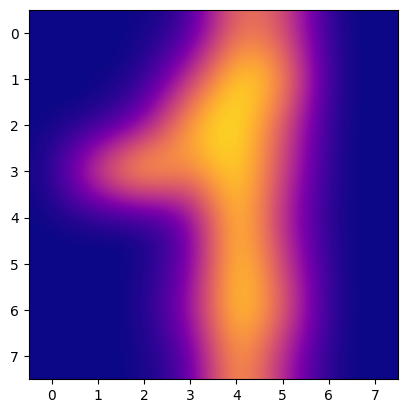

In [ ]:
# 任意の数字を表示する（例えば48番）plasmaで数字と色の関係を表す
plt.imshow(digits.images[47], cmap='plasma', interpolation='bicubic')
plt.show()

複数データを描画してみよう

In [ ]:
import numpy as np

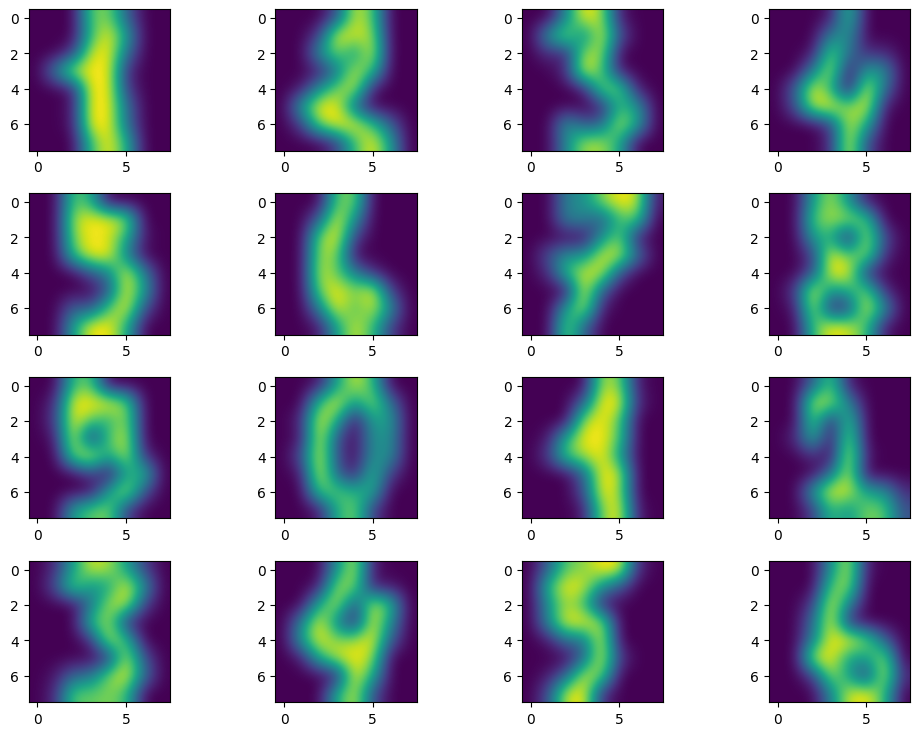

In [ ]:
# 数字を表示するための行と列の数
# 行
ROWS_COUNT = 4
# 列
COLUMNS_COUNT = 4
#
DIGIT_GRAPH_COUNT = ROWS_COUNT * COLUMNS_COUNT
# データオブジェクト保持用
subfig = []
# x軸データ
x = np.linspace(-1, 1, 10)

# figureオブジェクト作成サイズを決めます
fig = plt.figure(figsize=(12, 9))

#
for i in range(1, DIGIT_GRAPH_COUNT + 1):
    # 順序i番目のsubfigに追加します
    subfig.append(fig.add_subplot(ROWS_COUNT, COLUMNS_COUNT, i))
    # y軸データ(n次式)
    y = x ** i
    subfig[i - 1].imshow(digits.images[i],interpolation='bicubic', cmap='viridis')

# グラフ間の横とたての隙間の調整
fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

手書き数字データセットを３次元の空間で見る

In [ ]:
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D

# 手書き数字のデータをロードし、変数digitsに格納
digits = datasets.load_digits()

# 特徴量のセットを変数Xに、ターゲットを変数yに格納
all_features = digits.data
teacher_labels = digits.target

getcolor(color)は0～9の数字データの色を指定する関数

In [ ]:
def getcolor(color):
    if color==0:
        return 'red'
    elif color==1:
        return 'orange'
    elif color==2:
        return 'yellow'
    elif color==3:
        return 'greenyellow'
    elif color==4:
        return 'green'
    elif color==5:
        return 'cyan'
    elif color==6:
        return 'blue'
    elif color==7:
        return 'navy'
    elif color==8:
        return 'purple'
    else:
        return 'black'

次元削減をする

In [ ]:
# 主成分分析を行って、3次元へと次元を減らします
pca = decomposition.PCA(n_components=3)

# 主成分分析により、64次元のall_featuresを3次元のthree_featuresに変換
three_features = pca.fit_transform(all_features)

３次元散布図を描画します。
データの特徴が近いとその場所で固まる
blue(6)とgreen(4)のデータが分かりやすく固まっている

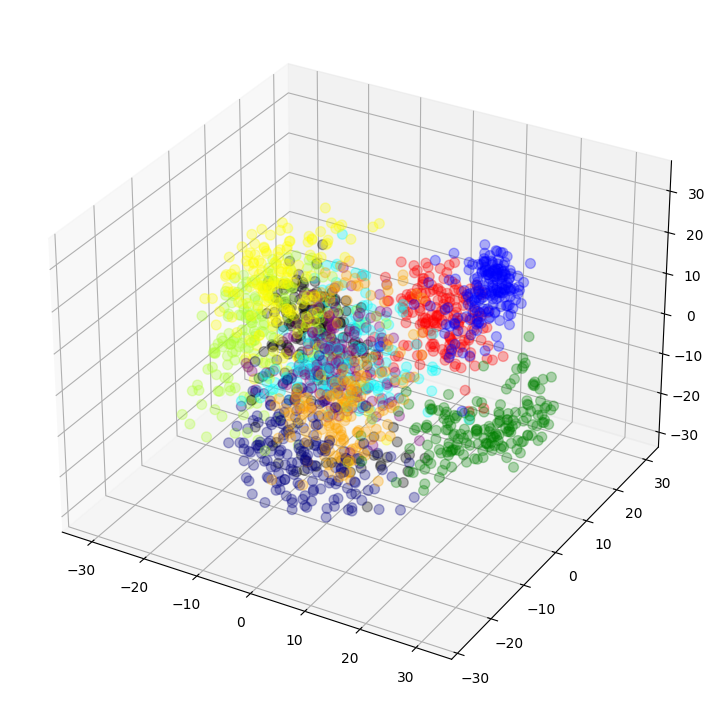

In [ ]:
# figureオブジェクト作成サイズを決めます
fig = plt.figure(figsize=(12, 9))
#
subfig = fig.add_subplot(111, projection = '3d')
# 教師データ(teacher_labels)に対応する色のリストを用意
colors = list(map(getcolor, teacher_labels))

# 三次元空間へのデータの色付き描画を行う
subfig.scatter(three_features[ : , 0 ], three_features[ : , 1 ], three_features[ : , 2 ], s=50, c=colors, alpha=0.3)

# 描画したグラフを表示
plt.show()

分類器をインポートする

In [ ]:
# 分類機(Classifiers) SVMとmetricsをインポートします
from sklearn import svm, metrics

In [ ]:
# 画像ファイルは同じサイズでなければいけません
images_and_labels = list(zip(digits.images, digits.target))
print('教師データ：',digits.target)

教師データ： [0 1 2 ... 8 9 8]


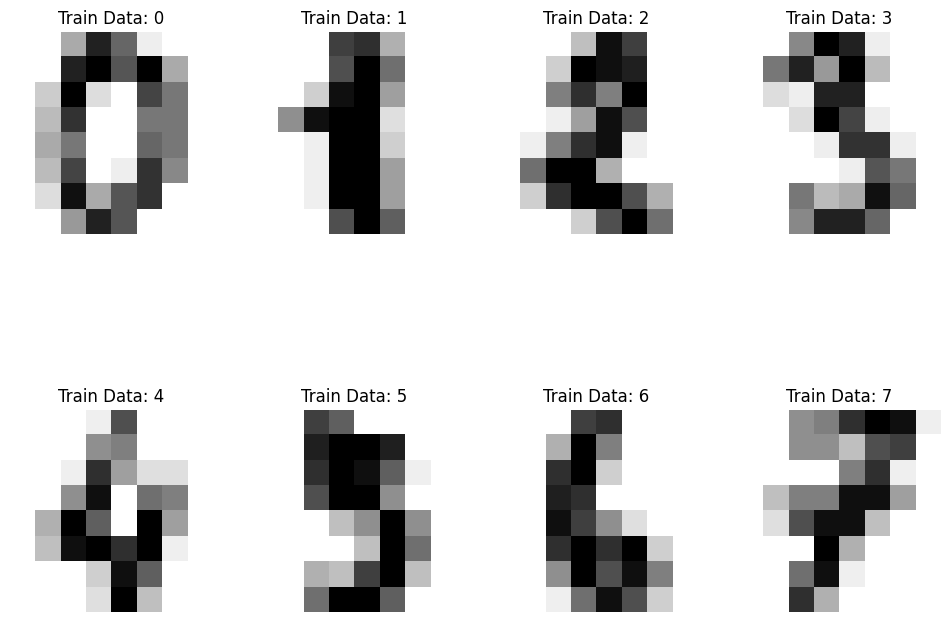

In [ ]:
# figureオブジェクト作成サイズを決めます
fig = plt.figure(figsize=(12, 9))
#
for index, (image, label) in enumerate(images_and_labels[ : 8 ]):
    plt.subplot(2, 4, index + 1)
    # 座標軸を表示しない
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Train Data: %i' % label)

In [ ]:
##データの個数を表示
num_samples = len(digits.images)
print(num_samples)

1797


データを再構成

In [ ]:
print(digits.images.shape)

(1797, 8, 8)


In [ ]:
# (1797, 8, 8)→(1797, 64)に変化させる
data = digits.images.reshape((num_samples,-1))

In [ ]:
print(data.shape)

(1797, 64)


分類器(SVC)の作成

In [ ]:
import sklearn.svm as svm

In [ ]:
model = svm.SVC(gamma = 0.001)

# 学習用の学習データと教師データ
train_features=data[ : num_samples // 2 ]
train_teacher_labels=digits.target[ : num_samples // 2 ]
# 検証用の学習データと教師データ
test_feature=data[num_samples // 2 : ]
test_teacher_labels=digits.target[num_samples // 2 : ]

# 最初の半分のデータを学習データとして、学習させます。
model.fit(train_features,train_teacher_labels)

SVC(gamma=0.001)

↑学習完了。
残りの半分のデータセットはテスト(評価)データとして使う

In [ ]:
expected = test_teacher_labels
#
predicted = model.predict(test_feature)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("分類機が分類した結果 %s: \n %s \n" % (model, classification_report(expected, predicted)))
print("コンフュージョンマトリックス:\n %s" % confusion_matrix(expected, predicted))

分類機が分類した結果 SVC(gamma=0.001): 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899
 

コンフュージョンマトリックス:
 [[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0 

検証とグラフ

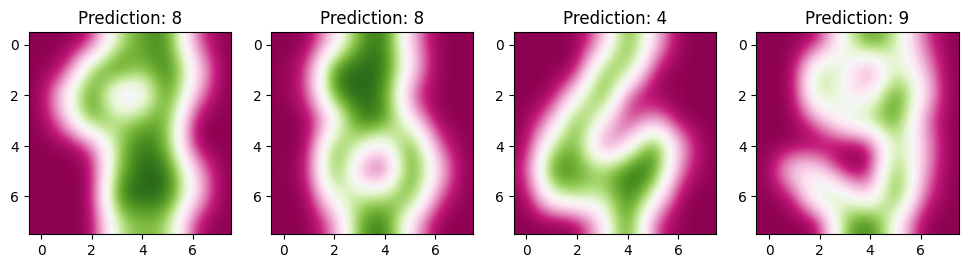

In [ ]:
# figureオブジェクト作成サイズを決めます
fig = plt.figure(figsize=(12, 9))
#
digits_and_predictions = list(zip(digits.images[num_samples // 2 : ], predicted))
for index, (image, prediction) in enumerate(digits_and_predictions[ : 4 ]):
    plt.subplot(2, 4, index + 5)
    plt.imshow(image, cmap='PiYG', interpolation='bicubic')
    plt.title('Prediction: %i' % prediction)

plt.show()